In [1]:
# Standard modules
import pdb
import sys
import os
import pickle
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from simstackwrapper import SimstackWrapper
from simstacktoolbox import SimstackToolbox

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# This step is only necessary if you split the stacking into multiple chunks.  

If you split the stack into chunks, e.g.; 

; First Third 
* classification = {"split_type":"nuvrj", "redshift":{"id":"lp_zBEST", "bins":"[0.01, 0.5, 1.0, 1.5, 2.0]"}, "stellar_mass":{"id":"lp_mass_med", "bins":"[9.5, 10.0, 10.5, 11.0, 12.0]"}, "split_params":{"id":"sfg", "bins":{"UV-R":"restNUV-R", "R-J":"restR-J"}}  }

; Second Third

* classification = {"split_type":"nuvrj", "redshift":{"id":"lp_zBEST", "bins":"[2.0, 2.5, 3.0, 3.5, 4.0]"}, "stellar_mass":{"id":"lp_mass_med", "bins":"[9.5, 10.0, 10.5, 11.0, 12.0]"}, "split_params":{"id":"sfg", "bins":{"UV-R":"restNUV-R", "R-J":"restR-J"}}  }

; Third Third

* classification = {"split_type":"nuvrj", "redshift":{"id":"lp_zBEST", "bins":"[4.0, 5.0, 6.0, 8.0, 10.0]"}, "stellar_mass":{"id":"lp_mass_med", "bins":"[9.5, 10.0, 10.5, 11.0, 12.0]"}, "split_params":{"id":"sfg", "bins":{"UV-R":"restNUV-R", "R-J":"restR-J"}}  }

Then they need to be merged in order to analyze as one set.  This is a 4 step process
1. Make a new directory, pickle_dict, to store the merged pickle.  
2. Inside that directory you need to copy the config file (e.g., cosmos2020_farmer.ini) and **edit the redshift bins** to reflect the merged redshift bins.   So in this example it would look like
* classification = {"split_type":"nuvrj", "redshift":{"id":"lp_zBEST", "bins":"[0.01, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 5.0, 6.0, 8.0, 10.0]"}, "stellar_mass":{"id":"lp_mass_med", "bins":"[9.5, 10.0, 10.5, 11.0, 12.0]"}, "split_params":{"id":"sfg", "bins":{"UV-R":"restNUV-R", "R-J":"restR-J"}}  }
3. Create a dictionary containing the names of the directories of the stacked fluxes, the merged directory, and the name of the config file.  See below for example.
4. Run merge_stack_and_catalog_pickles(pickle_dict)

## Farmer: z0-10 x 5M X 100boots

In [3]:
pickle_file_dict = {'stack_dirs': ['cosmos2020_nuvrj_0p01_0p5_1_1p5_2p0_5_stellar_mass_bins_background_atonce_farmer_bootstrap_1-101', 
                                   'cosmos2020_nuvrj_2_2p5_3_3p5_4p0_5_stellar_mass_bins_background_atonce_farmer_bootstrap_1-101',
                                   'cosmos2020_nuvrj_4_5_6_8_10p0_5_stellar_mass_bins_background_atonce_farmer_bootstrap_1-101'], 
                    'underscore_suffix': '', 
                    'merged_dir': 'cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_background_atonce_farmer_bootstrap_1-100', 
                    'config_filename': 'cosmos2020_alt_binning.ini',
                    'pickle_path':os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities")}

# Classic

In [2]:
pickle_file_dict = {'stack_dirs': ['cosmos2020_nuvrj_0p01_0p5_1_1p5_X_4_foreground_atonce_classic_bootstrap_1-100', 
                                   'cosmos2020_nuvrj_1p5_2_2p5_3_3p5_X_4_foreground_atonce_classic_bootstrap_1-100',
                                   'cosmos2020_nuvrj_3p5_4_5_6_8_10_X_4_foreground_atonce_classic_bootstrap_1-100'], 
                    'underscore_suffix': '', 
                    'merged_dir': 'cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foreground_atonce_classic_bootstrap_1-100',
                    'config_filename': 'cosmos2020_classic.ini',
                    'pickle_path':os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities")}

# Null Test

In [3]:
pickle_file_dict = {'stack_dirs': ['cosmos2020_nuvrj_0p01_0p5_1_1p5_2p0_X_4_foregnd_atonce_bootstrap_1-10_null', 
                                   'cosmos2020_nuvrj_2_2p5_3_3p5_4p0_X_4_foregnd_atonce_bootstrap_1-10_null',
                                   'cosmos2020_nuvrj_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-10_null'], 
                    'underscore_suffix': '', 
                    'merged_dir': 'cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_farmer_bootstrap_1-10_null', 
                    'config_filename': 'cosmos2020_null_test.ini',
                    'pickle_path':os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities")}

## SAME FWHM Test

In [2]:
pickle_file_dict = {'stack_dirs': ['cosmos2020_smoothed_nuvrj_0p01_0p5_1_1p5_2p0_X_4_foreground_atonce_bootstrap_1-10', 
                                   'cosmos2020_smoothed_nuvrj_2_2p5_3_3p5_4p0_X_4_foregnd_atonce_bootstrap_1-10',
                                   'cosmos2020_smoothed_nuvrj_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-10'], 
                    'underscore_suffix': '', 
                    'merged_dir': 'cosmos2020_smoothed_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foreground_atonce_bootstrap_1-10',
                    'config_filename': 'cosmos2020_same_fwhm.ini',
                    'pickle_path':os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities")}

## Farmer: z0-10 x 4M X 100boots (Current Nominal)

In [2]:
pickle_file_dict = {'stack_dirs': ['cosmos2020_nuvrj_0p01_0p5_1_1p5_background_atonce_farmer_bootstrap_100', 
                                   'cosmos2020_nuvrj_1p5_2_2p5_3_3p5_background_atonce_farmer_bootstrap_100',
                                   'cosmos2020_nuvrj_3p5_4_5_6_8_10_X_4_atonce_farmer_bootstrap_1-100'], 
                    'underscore_suffix': '', 
                    'merged_dir': 'cosmos2020_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_atonce_farmer_bootstrap_1-100',
                    'config_filename': 'cosmos2020_alt_binning.ini',
                    'pickle_path':os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities")}

## Farmer: z0-10 x 4M X 100boots (Final Nominal)

In [2]:
pickle_file_dict = {'stack_dirs': ['cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2p0_X_4_foregnd_atonce_bootstrap_1-150', 
                                   'cosmos2020_farmer_nuvrj_2_2p5_3_3p5_4p0_X_4_foregnd_atonce_bootstrap_1-150',
                                   'cosmos2020_farmer_nuvrj_4_5_6_8_10p0_X_4_foregnd_atonce_bootstrap_1-150'], 
                    'underscore_suffix': '', 
                    'merged_dir': 'cosmos2020_farmer_nuvrj_0p01_0p5_1_1p5_2_2p5_3_3p5_4_5_6_8_10_X_4_foregnd_atonce_bootstrap_1-150',
                    'config_filename': 'cosmos2020_farmer.ini',
                    'pickle_path':os.environ['PICKLESPATH']+'/'+os.path.join("simstack","stacked_flux_densities")}

In [3]:
def merge_stack_and_catalog_pickles(pickle_dict, keep_full_catalog=True, save_pickle=True, overwrite_pickle=False):
    
    pickle_path_combined = os.path.join(pickle_dict['pickle_path'],pickle_dict['merged_dir']+pickle_dict['underscore_suffix'])
    path_save_pickle = os.path.join(pickle_path_combined,pickle_dict['merged_dir']+'.pkl')
    
    if os.path.isfile(path_save_pickle) and not overwrite_pickle:
        return SimstackToolbox.import_saved_pickles(path_save_pickle)
    
    for iobj, path_obj in enumerate(pickle_dict['stack_dirs']):
        path_object = os.path.join(pickle_dict['pickle_path'],path_obj+pickle_dict['underscore_suffix'],path_obj+'.pkl')

        if os.path.isfile(path_object):
            temp_object = SimstackToolbox.import_saved_pickles(path_object)
        else:
            print(path_object ,' does not exist')
            break
                
        if not iobj:
            merge_object = temp_object
        else:
            merge_object.combine_objects(temp_object)

        if keep_full_catalog:
            path_ini_file = os.path.join(pickle_path_combined, pickle_dict['config_filename'])
            if os.path.isfile(path_ini_file):
                catalog_object = SimstackWrapper(path_ini_file, read_maps=False, read_catalog=True, keep_catalog=True, stack_automatically=False, save_automatically=False)
                merge_object.catalog_dict['tables']['full_table'] = catalog_object.catalog_dict['tables']['full_table']
            else:
                print(path_ini_file ,' does not exist')
                break
        
        if save_pickle:            
            SimstackToolbox.save_to_pickles(path_save_pickle, merge_object)
                
    return merge_object

In [4]:
# Merge and Save to Pickle
save_pickle = True
merged_object = merge_stack_and_catalog_pickles(pickle_file_dict, save_pickle=save_pickle, overwrite_pickle=True)

# OPTIONALLY INSPECT MERGED FLUXES

In [5]:
from simstackresults import SimstackResults
merged_object = SimstackResults(merged_object)

In [6]:
merged_object.parse_results(catalog_object=merged_object, estimate_mcmcs=False)

In [7]:
from simstackplots import SimstackPlots
merged_object = SimstackPlots(merged_object)

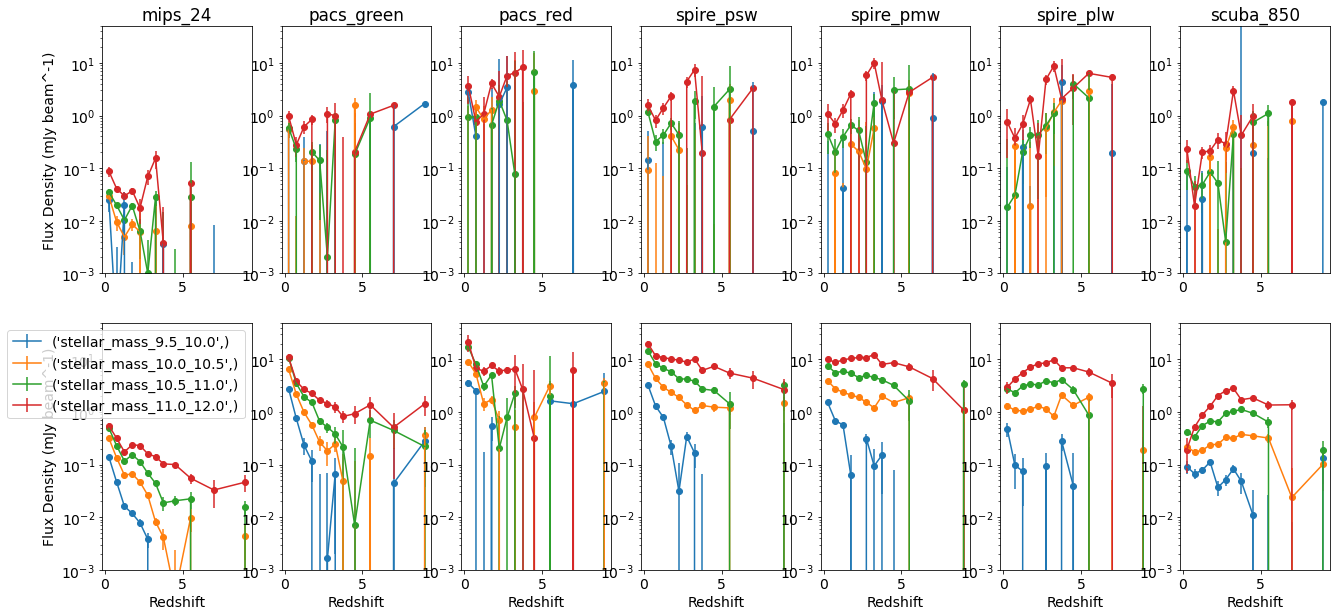

In [8]:
merged_object.plot_flux_densities()

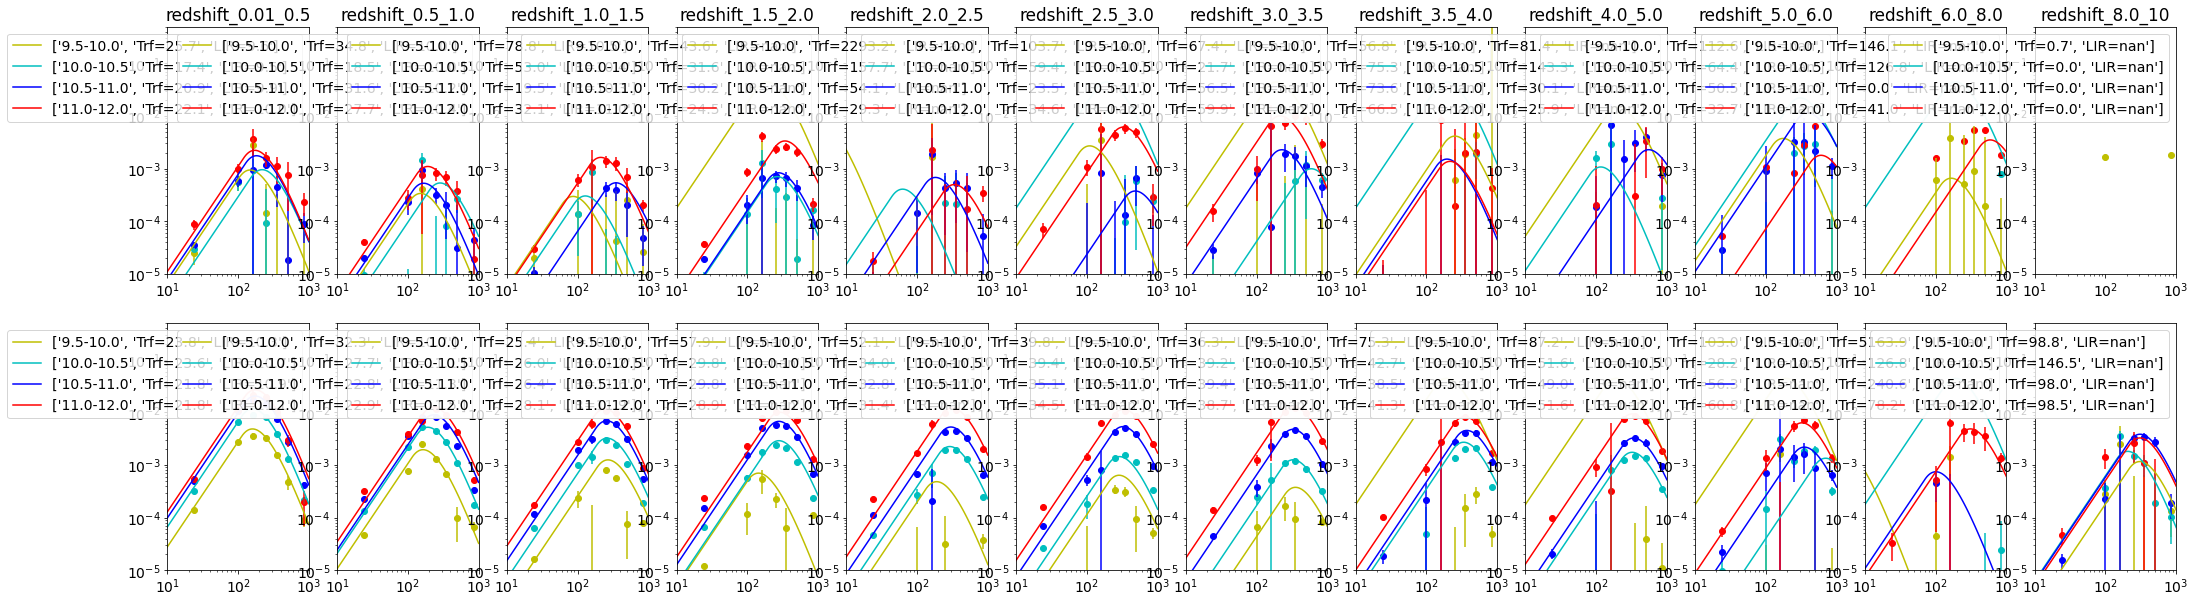

In [9]:
merged_object.plot_seds(merged_object.results_dict['sed_bootstrap_results_dict'])